# Introduction to NumPy

## What is NumPy?

NumPy (Numerical Python) is an **open source Python library that’s used in almost every field of science and engineering**. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development.

NumPy is the **fundamental package for scientific computing in Python**. It is a Python library that provides a **multidimensional array object**, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

> At the core of the NumPy package, is the **ndarray** object.

There are several important differences between NumPy arrays and the standard Python sequences:

- NumPy arrays have a **fixed size at creation**, unlike Python lists (which can grow dynamically). Changing the size of an ndarray will create a new array and delete the original.
- The elements in a NumPy array are **all required to be of the same data type**, and thus will be the **same size in memory**. The exception: one can have arrays of (Python, including NumPy) objects, thereby allowing for arrays of different sized elements.
- NumPy arrays **facilitate advanced mathematical and other types of operations** on large numbers of data. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences.
- A growing plethora of scientific and mathematical Python-based packages are using NumPy arrays. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.

One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data.

NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

## Installing NumPy

The only prerequisite for installing NumPy is Python itself. If you don’t have Python yet and want the simplest way to get started.

NumPy can be installed with conda, with pip, with a package manager on macOS and Linux, or from source.

If you use UV pip, you can install NumPy with: `uv pip install numpy`

We added NumPy to the requirements.txt file, so it's already installed by setting the environment.

To access NumPy and its functions import it in your Python code like this:

In [12]:
import numpy as np

We shorten the imported name to np for better readability of code using NumPy. This is a widely adopted convention that makes your code more readable for everyone working on it. We recommend to always use import numpy as np.

In [13]:
np.__version__

'2.2.3'

## Understanding Data Types in Python

[Understanding Data Types in Python](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)


Effective data-driven science and computation **requires understanding how data is stored and manipulated**. This section outlines and contrasts how arrays of data are handled in the Python language itself, and how NumPy improves on this.

Users of Python are often drawn-in by its ease of use, one piece of which is dynamic typing. While a **statically-typed language like C or Java** requires each variable to be explicitly declared, a dynamically-typed language like Python skips this specification. For example, in C you might specify a particular operation as follows:

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

While in Python the equivalent operation could be written this way:

```python
# Python code
result = 0
for i in range(100):
    result += i
```


Notice the main difference: in C, the data types of each variable are explicitly declared, while in Python the types are dynamically inferred. This means, for example, that **we can assign any kind of data to any variable**:


In [14]:
# Python code
x = 4
x = "four"

Here we've switched the contents of x from an integer to a string. The same thing in C would lead (depending on compiler settings) to a compilation error or other unintented consequences:

```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

This sort of flexibility is one piece that makes Python and other dynamically-typed languages convenient and easy to use. Understanding how this works is an important piece of learning to analyze data efficiently and effectively with Python. But what this type-flexibility also points to is the fact that **Python variables are more than just their value; they also contain extra information about the type of the value**. We'll explore this more in the sections that follow.


### A Python Integer Is More Than Just an Integer

The standard Python implementation is written in C. This means that every Python object is simply a cleverly-disguised C structure, which contains not only its value, but other information as well. For example, when we define an integer in Python, such as x = 10000, x is not just a "raw" integer. It's actually a pointer to a compound C structure, which contains several values. Looking through the Python 3.4 source code, we find that the integer (long) type definition effectively looks like this (once the C macros are expanded):

```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

A single integer in Python 3.4 actually contains four pieces:

- ob_refcnt, a reference count that helps Python silently handle memory allocation and deallocation
- ob_type, which encodes the type of the variable
- ob_size, which specifies the size of the following data members
- ob_digit, which contains the actual integer value that we expect the Python variable to represent.

This means that there is some overhead in storing an integer in Python as compared to an integer in a compiled language like C, as illustrated in the following figure:

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png" alt="Integer Memory Layout">


Here PyObject_HEAD is the part of the structure containing the reference count, type code, and other pieces mentioned before.

Notice the difference here: a C integer is essentially a label for a position in memory whose bytes encode an integer value. A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value. This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically. All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects.


### A Python List Is More Than Just a List

Let's consider now what happens when we use a Python data structure that holds many Python objects. The standard mutable multi-element container in Python is the list. We can create a list of integers as follows:


In [15]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
type(L[0])

int

Or, similarly, a list of strings:


In [20]:
L2 = [str(c) for c in L]

In [21]:
type(L2[0])

str

Because of Python's dynamic typing, we can even create heterogeneous lists:


In [22]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array. The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png" alt="Array Memory Layout">


At the implementation level, the array essentially contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier. Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.


### Fixed-Type Arrays in Python

Python offers several different options for storing data in efficient, fixed-type data buffers. The built-in array module can be used to create dense arrays of a uniform type:


In [23]:
import array

L = list(range(10))
A = array.array("i", L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here 'i' is a type code indicating the contents are integers.

Much more useful, however, is the ndarray object of the NumPy package. While Python's array object provides efficient storage of array-based data, NumPy adds to this efficient operations on that data.


## NumPy Speed


Python is what we call a high-level language. High level languages allow you to write programs faster as the interpreter makes the decisions on how to execute your instructions. In contrast, when you use low-level languages like C, you define exactly how memory will be managed and how the processor will execute your instructions. This means that coding in a low-level language takes longer, however you have more ability to optimize your code to run faster.

The points about sequence size and speed are particularly important in scientific computing. As a simple example, consider the case of multiplying each element in a 1-D sequence with the corresponding element in another sequence of the same length. If the data are stored in two Python lists, a and b, we could iterate over each element:


In [24]:
a = list(range(10000000))
b = list(range(20000000, 30000000))
c = []

In [25]:
a = list(range(10000000))
b = list(range(20000000, 30000000))
c = []

In [26]:
%%timeit -n 1 -r 1
for i in range(len(a)):
    c.append(a[i] * b[i])  # noqa: PERF401

print(c[:10])

[0, 20000001, 40000004, 60000009, 80000016, 100000025, 120000036, 140000049, 160000064, 180000081]
1.88 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


This produces the correct answer, but if a and b each contain millions of numbers, we will pay the price for the inefficiencies of looping in Python. We could accomplish the same task much more quickly in C by writing (for clarity we neglect variable declarations and initializations, memory allocation, etc.)

```c
for (i = 0; i < rows; i++) {
  c[i] = a[i]*b[i];
}
```


This saves all the overhead involved in interpreting the Python code and manipulating Python objects, but at the expense of the benefits gained from coding in Python. Furthermore, the coding work required increases with the dimensionality of our data. In the case of a 2-D array, for example, the C code (abridged as before) expands to

```c
for (i = 0; i < rows; i++) {
  for (j = 0; j < columns; j++) {
    c[i][j] = a[i][j]*b[i][j];
  }
}
```


**NumPy gives us the best of both worlds**: element-by-element operations are the “default mode” when an ndarray is involved, but the element-by-element operation is speedily executed by pre-compiled C code. In NumPy does what the earlier examples do, at near-C speeds, but with the code simplicity we expect from something based on Python.


In [27]:
import numpy as np

a = np.arange(10000000)
b = np.arange(20000000, 30000000)

In [ ]:
%%timeit -n 1 -r 1

c = (10 + a) * b

print(c[:10])

[200000000 220000011 240000024 260000039 280000056 300000075 320000096
 340000119 360000144 380000171]
116 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Why is NumPy Fast?**

- **Vectorization** describes the absence of any explicit looping, indexing, etc., in the code - these things are taking place, of course, just “behind the scenes” in optimized, pre-compiled C code. Vectorized code has many advantages, among which are:
  - vectorized code is more concise and easier to read
  - fewer lines of code generally means fewer bugs
  - the code more closely resembles standard mathematical notation (making it easier, typically, to correctly code mathematical constructs)
  - vectorization results in more “Pythonic” code. Without vectorization, our code would be littered with inefficient and difficult-to-read for loops.
- **Broadcasting** is the term used to describe the implicit element-by-element behavior of operations; generally speaking, in NumPy all operations, not just arithmetic operations, but logical, bit-wise, functional, etc., behave in this implicit element-by-element fashion, i.e., they broadcast. Moreover, in the example above, a and b could be multidimensional arrays of the same shape, or a scalar and an array, or even two arrays of with different shapes, provided that the smaller array is “expandable” to the shape of the larger in such a way that the resulting broadcast is unambiguous.


## Example: Data analysis in pure Python vs NumPy/Pandas

Goal: Sum all the values in the `revenues` column.

In [29]:
# Data analysis in pure Python

import csv
from pathlib import Path

dataset_path = Path.cwd().parent / "data" / "f500.csv"
print(f"Dataset full path: {dataset_path}")

with dataset_path.open("r") as f:
    f500 = list(csv.reader(f))

print(f"Dateset length: {len(f500)}")

# first row is the CSV header
print(f500[:3])

total_revenues = sum([int(row[2]) for row in f500[1:]])
print(f"The total revenue is: {total_revenues}")

Dataset full path: c:\Users\ervin.strmcnik\Desktop\Python2_AnalizaPodatkov_Feb2025\python-data-analytics\data\f500.csv
Dateset length: 501
[['company', 'rank', 'revenues', 'revenue_change', 'profits', 'assets', 'profit_change', 'ceo', 'industry', 'sector', 'previous_rank', 'country', 'hq_location', 'website', 'years_on_global_500_list', 'employees', 'total_stockholder_equity'], ['Walmart', '1', '485873', '0.8', '13643.0', '198825', '-7.2', 'C. Douglas McMillon', 'General Merchandisers', 'Retailing', '1', 'USA', 'Bentonville, AR', 'http://www.walmart.com', '23', '2300000', '77798'], ['State Grid', '2', '315199', '-4.4', '9571.3', '489838', '-6.2', 'Kou Wei', 'Utilities', 'Energy', '2', 'China', 'Beijing, China', 'http://www.sgcc.com.cn', '17', '926067', '209456']]
The total revenue is: 27708179


In [30]:
# Data analysis in NumPy and Pandas

from pathlib import Path

import pandas as pd

dataset_path = Path.cwd().parent / "data" / "f500.csv"

total_revenues = pd.read_csv(dataset_path)["revenues"].sum()
print(f"The total revenue is: {total_revenues}")

The total revenue is: 27708179


## NumPy basics - Introduction to Ndarrays

The NumPy library contains multidimensional array data structures, such as the homogeneous, N-dimensional ndarray, and a large library of functions that operate efficiently on these data structures.

In [31]:
# This widespread convention allows access to NumPy features with a short, recognizable prefix (np.) while distinguishing NumPy features from others that have the same name.

import numpy as np

Depending on the characteristics of the data and the types of operations that need to be performed, other containers may be more appropriate; by exploiting these characteristics, we can improve speed, reduce memory consumption, and offer a high-level syntax for performing a variety of common processing tasks. NumPy shines when there are large quantities of “homogeneous” (same-type) data to be processed on the CPU.

In computer programming, an **array is a structure for storing and retrieving data**. We often talk about an array as if it were a grid in space, with each cell storing one element of the data. 

![Array](./images/img_01.png)

A three-dimensional array would be like a set of tables, perhaps stacked as though they were printed on separate pages. In NumPy, this idea is generalized to an arbitrary number of dimensions, and so the fundamental array class is called ndarray: it represents an “N-dimensional array”.

**Most NumPy arrays have some restrictions.** For instance:
- All elements of the array must be of the same type of data.
- Once created, the total size of the array can’t change.
- The shape must be “rectangular”, not “jagged”; e.g., each row of a two-dimensional array must have the same number of columns.

When these conditions are met, NumPy exploits these characteristics to make the array faster, more memory efficient, and more convenient to use than less restrictive data structures.

**There are several ways to create arrays.** For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [32]:
a = np.array([1, 2, 3, 4, 5, 6])
print(a)
a

[1 2 3 4 5 6]


array([1, 2, 3, 4, 5, 6])

In [33]:
a.dtype

dtype('int64')

In [34]:
a_float = np.array([1.2, 3.5, 5.1])
print(a_float.dtype)
a_float

float64


array([1.2, 3.5, 5.1])

Elements of an array can be accessed in various ways. For instance, we can access an individual element of this array as we would access an element in the original list: using the integer index of the element within square brackets.

In [35]:
a[0]

np.int64(1)

> As with built-in Python sequences, NumPy arrays are “0-indexed”: the first element of the array is accessed using index 0, not 1.

Like the original list, the array is mutable.

In [36]:
a[0] = 10
a

array([10,  2,  3,  4,  5,  6])

Also like the original list, Python slice notation can be used for indexing.

In [37]:
a[:3]

array([10,  2,  3])

One major difference is that slice indexing of a list copies the elements into a new list, but **slicing an array returns a view**: an object that refers to the data in the original array. The original array can be mutated using the view.

In [38]:
c = a[3:]

In [39]:
c

array([4, 5, 6])

In [40]:
c[0] = 40
c

array([40,  5,  6])

In [41]:
a

array([10,  2,  3, 40,  5,  6])

Two- and higher-dimensional arrays can be initialized from nested Python sequences:

In [42]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In NumPy, a dimension of an array is sometimes referred to as an “axis”. 

Another difference between an array and a list of lists is that an element of the array can be accessed by specifying the index along each axis within a single set of square brackets, separated by commas. For instance, the element 8 is in row 1 and column 3:

In [43]:
b[1, 3]

np.int64(8)

In [44]:
# ndarray.ndim: the number of axes (dimensions) of the array.
print(f"a ndim: {a.ndim}, b ndim: {b.ndim}")

# ndarray.shape: the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension.
print(f"a shape: {a.shape}, b shape: {b.shape}")

# ndarray.size: the total number of elements of the array. This is equal to the product of the elements of shape.
print(f"a size: {a.size}, b size: {b.size}")

# ndarray.dtype: an object describing the type of the elements in the array.
print(f"a dtype: {a.dtype}, b dtype: {b.dtype}")

# ndarray.itemsize: the size in bytes of each element of the array.
print(f"a itemsize: {a.itemsize}, b itemsize: {b.itemsize}")

# ndarray.data: the buffer containing the actual elements of the array.
# Normally, we won't need to use this attribute because we will access the elements in an array using indexing facilities.
print(f"a data: {a.data}, b data: {b.data}")

a ndim: 1, b ndim: 2
a shape: (6,), b shape: (3, 4)
a size: 6, b size: 12
a dtype: int64, b dtype: int64
a itemsize: 8, b itemsize: 8
a data: <memory at 0x000001D805243B80>, b data: <memory at 0x000001D829DA8FB0>


**How to create a basic array**

Often, the elements of an array are originally unknown, but its size is known. Hence, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

You can easily create an array filled with 0’s:

In [45]:
np.zeros(2)

array([0., 0.])

In [46]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [47]:
# an array filled with 1's:
np.ones(2)

array([1., 1.])

Or even an empty array! The function empty creates an array whose initial content is random and depends on the state of the memory. The reason to use empty over zeros (or something similar) is speed - just make sure to fill every element afterwards!

In [49]:
np.empty(5)  # may vary

array([0.00000000e+000, 1.00196635e-311, 1.00196635e-311, 1.00196635e-311,
       1.00200467e-311])

And even an array that contains a range of evenly spaced intervals. To do this, you will specify the first number, last number, and the step size.

In [59]:
np.arange(2, 9, 2)

array([2, 4, 6, 8])

In [61]:
np.arange(0, 2, 0.3)  # it accepts float arguments

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

You can also use np.linspace() to create an array with values that are spaced linearly in a specified interval:

In [60]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

**Assigning Values**


Modify values within an ndarray with the following syntax(in pseudocode):


    ndarray[location_of_values] = new_value


Let's take a look at what that looks like in actual code. With our 1D array, we can specify one specific index location:


In [29]:
a = np.array(["red", "blue", "black", "blue", "purple"])
a[0] = "orange"
print(a)

['orange' 'blue' 'black' 'blue' 'purple']


Or we can assign multiple values at once:


In [30]:
a[3:] = "pink"
print(a)

['orange' 'blue' 'black' 'pink' 'pink']


With a 2D ndarray, just like with a 1D ndarray, we can assign one specific index location:


In [31]:
ones = np.ones((3, 5))
ones[1, 2] = 99
print(ones)

[[ 1.  1.  1.  1.  1.]
 [ 1.  1. 99.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


We can also assign a whole row...


In [32]:
ones[0] = 42
print(ones)

[[42. 42. 42. 42. 42.]
 [ 1.  1. 99.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


...or a whole column:


In [33]:
ones[:, 2] = 0
print(ones)

[[42. 42.  0. 42. 42.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]]


**Adding, removing, and sorting elements**

Sorting an array is simple with `np.sort()`. You can specify the axis, kind, and order when you call the function.

In [ ]:
arr = np.array([2, 1, 5, 3, 7, 4, 6, 8])
np.sort(arr)  # returns a sorted copy of an array

array([1, 2, 3, 4, 5, 6, 7, 8])

If you start with these arrays:

In [65]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

You can concatenate them with `np.concatenate()`.

In [66]:
np.concatenate((a, b))

array([1, 2, 3, 4, 5, 6, 7, 8])

In [67]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6]])

In [70]:
np.concatenate((x, y), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In order to remove elements from an array, it’s simple to use indexing to select the elements that you want to keep.

In [72]:
z = a[2:]
z

array([3, 4])

**Reshaping an array**

Using `arr.reshape()` will give a new shape to an array without changing the data. Just remember that when you use the reshape method, the array you want to produce needs to have the same number of elements as the original array. If you start with an array with 12 elements, you’ll need to make sure that your new array also has a total of 12 elements.


In [75]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

You can use `reshape()` to reshape your array. For example, you can reshape this array to an array with three rows and two columns:

In [77]:
b = a.reshape(3, 2)
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [78]:
c = np.arange(24).reshape(2, 3, 4)
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


**Printing arrays**

When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:
- the last axis is printed from left to right,
- the second-to-last is printed from top to bottom,
- the rest are also printed from top to bottom, with each slice separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [84]:
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [85]:
b = np.arange(12).reshape(4, 3)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [86]:
c = np.arange(24).reshape(2, 3, 4)
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corners:


In [87]:
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


**Datatypes**

- [More info: Data type objects (dtype)](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)
- [List of scalars](https://numpy.org/doc/stable/reference/arrays.scalars.html)

Unless explicitly specified (more on this later), np.array tries to infer a good data type for the array that it creates. The data type is stored in a special dtype metadata object.

A data type object (an instance of numpy.dtype class) describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted. 


Every NumPy array is a grid of elements of the same type. NumPy provides a large set of numeric datatypes that you can use to construct arrays. 

<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th>Data type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>bool_</code></td>
<td>Boolean (True or False) stored as a byte</td>
</tr>
<tr>
<td><code>int_</code></td>
<td>Default integer type (same as C <code>long</code>; normally either <code>int64</code> or <code>int32</code>)</td>
</tr>
<tr>
<td><code>intc</code></td>
<td>Identical to C <code>int</code> (normally <code>int32</code> or <code>int64</code>)</td>
</tr>
<tr>
<td><code>intp</code></td>
<td>Integer used for indexing (same as C <code>ssize_t</code>; normally either <code>int32</code> or <code>int64</code>)</td>
</tr>
<tr>
<td><code>int8</code></td>
<td>Byte (-128 to 127)</td>
</tr>
<tr>
<td><code>int16</code></td>
<td>Integer (-32768 to 32767)</td>
</tr>
<tr>
<td><code>int32</code></td>
<td>Integer (-2147483648 to 2147483647)</td>
</tr>
<tr>
<td><code>int64</code></td>
<td>Integer (-9223372036854775808 to 9223372036854775807)</td>
</tr>
<tr>
<td><code>uint8</code></td>
<td>Unsigned integer (0 to 255)</td>
</tr>
<tr>
<td><code>uint16</code></td>
<td>Unsigned integer (0 to 65535)</td>
</tr>
<tr>
<td><code>uint32</code></td>
<td>Unsigned integer (0 to 4294967295)</td>
</tr>
<tr>
<td><code>uint64</code></td>
<td>Unsigned integer (0 to 18446744073709551615)</td>
</tr>
<tr>
<td><code>float_</code></td>
<td>Shorthand for <code>float64</code>.</td>
</tr>
<tr>
<td><code>float16</code></td>
<td>Half precision float: sign bit, 5 bits exponent, 10 bits mantissa</td>
</tr>
<tr>
<td><code>float32</code></td>
<td>Single precision float: sign bit, 8 bits exponent, 23 bits mantissa</td>
</tr>
<tr>
<td><code>float64</code></td>
<td>Double precision float: sign bit, 11 bits exponent, 52 bits mantissa</td>
</tr>
<tr>
<td><code>complex_</code></td>
<td>Shorthand for <code>complex128</code>.</td>
</tr>
<tr>
<td><code>complex64</code></td>
<td>Complex number, represented by two 32-bit floats</td>
</tr>
<tr>
<td><code>complex128</code></td>
<td>Complex number, represented by two 64-bit floats</td>
</tr>
</tbody>
</table>

</div>


By default, the dtype of the created array is float64, but it can be specified via the key word argument dtype.

In [88]:
np.ones(2).dtype

dtype('float64')

In [90]:
x = np.ones(2, dtype=np.int64)
x.dtype

dtype('int64')

In [91]:
x = np.array([1, 2])  # Let numpy choose the datatype
print(x.dtype)
print(x.nbytes)

x = np.array([1.0, 2.0])  # Let numpy choose the datatype
print(x.dtype)
print(x.nbytes)

int64
16
float64
16


In [92]:
x = np.array([1, 2], dtype=np.int64)  # Force a particular datatype
print(x.dtype)
print(x.nbytes)

x = np.array([1, 2], dtype=np.int8)  # Force a particular datatype
print(x.dtype)
print(x.nbytes)

int64
16
int8
2


NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations. Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

Note that when constructing an array, they can be specified using a string:


In [93]:
np.zeros(10, dtype="int16")

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

Or using the associated NumPy object:


In [94]:
np.ones(10, dtype=np.int16)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int16)

In [96]:
x = np.array([189, 22, -129], dtype=np.int8)  # Force a particular datatype, OverflowError
print(x)

OverflowError: Python integer 189 out of bounds for int8

In [97]:
a = np.array(["a", "b", "c"])
a.dtype  # Unicode string of 1 character

dtype('<U1')

In [98]:
a = np.array(["a", "b", "c", 23, 34.5, True])
print(a.dtype)
print(a)

<U32
['a' 'b' 'c' '23' '34.5' 'True']


## Basic Operations and Universal Functions

Example of adding two columns of data. In Python, we'd have to construct a for-loop and add each pair of values from each row individually:


In [142]:
my_numbers = [[6, 5], [9, 1], [2, 4], [7, 14], [8, 6]]

sums = []
for row in my_numbers:
    row_sums = row[0] + row[1]
    sums.append(row_sums)

print(sums)

[11, 10, 6, 21, 14]


In NumPy you can add the arrays together with the plus sign.

<img alt="https://numpy.org/doc/stable/_images/np_data_plus_ones.png" src="https://numpy.org/doc/stable/_images/np_data_plus_ones.png">

In [138]:
data = np.array([1, 2])
ones = np.ones(2, dtype=int)
data + ones

array([2, 3])

<img alt="https://numpy.org/doc/stable/_images/np_sub_mult_divide.png" src="https://numpy.org/doc/stable/_images/np_sub_mult_divide.png">

In [140]:
print(data - ones)
print(data * data)
print(data / data)

[0 1]
[1 4]
[1. 1.]


Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.


In [99]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
c = a - b
print(c)

[20 29 38 47]


In [101]:
b**2

array([0, 1, 4, 9])

In [102]:
b * 4

array([ 0,  4,  8, 12])

NumPy understands that the multiplication should happen with each cell. That concept is called broadcasting. Broadcasting is a mechanism that allows NumPy to perform operations on arrays of different shapes. The dimensions of your array must be compatible, for example, when the dimensions of both arrays are equal or when one of them is 1. If the dimensions are not compatible, you will get a ValueError.


In [103]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [104]:
a < 35

array([ True,  True, False, False])

Unlike in many matrix languages, the product operator \* operates elementwise in NumPy arrays. The matrix product can be performed using the @ operator (in python >=3.5) or the dot function or method:


In [105]:
A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0], [3, 4]])
print(A * B)
print(A @ B)
print(A.dot(B))

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


Some operations, such as += and \*=, act in place to modify an existing array rather than create a new one.


In [109]:
rg = np.random.default_rng(1)  # create instance of default random number generator
a = np.ones((2, 3), dtype=int)
b = rg.random((2, 3))
print(a)
print(b)

[[1 1 1]
 [1 1 1]]
[[0.51182162 0.9504637  0.14415961]
 [0.94864945 0.31183145 0.42332645]]


In [110]:
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [111]:
b += a
b

array([[3.51182162, 3.9504637 , 3.14415961],
       [3.94864945, 3.31183145, 3.42332645]])

In [112]:
a += b  # b is not automatically converted to integer type

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).


In [117]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, np.pi, 3)
print(f"a type is {a.dtype}, b type is {b.dtype}")

a type is int32, b type is float64


In [118]:
c = a + b
c

array([1.        , 2.57079633, 4.14159265])

In [119]:
c.dtype

dtype('float64')

Many unary operations, such as computing the `sum` of all the elements in the array, are implemented as methods of the ndarray class.

In [121]:
a = rg.random((2, 3))

In [122]:
a.sum()

np.float64(3.1057109529998157)

In [123]:
a.min()

np.float64(0.027559113243068367)

In [124]:
a.max()

np.float64(0.8277025938204418)

By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the `axis` parameter you can apply an operation along the specified axis of an array.

<p><img alt="The axis parameter" src="https://s3.amazonaws.com/dq-content/289/axis_param.svg"></p>


In [126]:
b = np.arange(12).reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
b.sum(axis=0)  # sum of each column

array([12, 15, 18, 21])

In [ ]:
b.sum(axis=1)  # sum of each row

array([ 6, 22, 38])

In [ ]:
b.min(axis=1)  # min of each row

array([0, 4, 8])

In [130]:
b.cumsum(axis=1)  # cumulative sum along each row

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called **universal functions** (`ufunc`). Within NumPy, these functions operate elementwise on an array, producing an array as output.


In [132]:
b = np.arange(3)
b

array([0, 1, 2])

In [133]:
np.exp(b)  # calculates e^x for each value of x in your input array

array([1.        , 2.71828183, 7.3890561 ])

In [134]:
np.sqrt(b)

array([0.        , 1.        , 1.41421356])

In [135]:
c = np.array([2.0, -1.0, 4.0])
np.add(b, c)

array([2., 0., 6.])

In [136]:
# same as b + c
b + c

array([2., 0., 6.])

<div class="admonition seealso">
<p><a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.all.html#numpy.all" title="numpy.all"><code class="xref py py-obj docutils literal notranslate"><span class="pre">all</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.any.html#numpy.any" title="numpy.any"><code class="xref py py-obj docutils literal notranslate"><span class="pre">any</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html#numpy.apply_along_axis" title="numpy.apply_along_axis"><code class="xref py py-obj docutils literal notranslate"><span class="pre">apply_along_axis</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.argmax.html#numpy.argmax" title="numpy.argmax"><code class="xref py py-obj docutils literal notranslate"><span class="pre">argmax</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.argmin.html#numpy.argmin" title="numpy.argmin"><code class="xref py py-obj docutils literal notranslate"><span class="pre">argmin</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.argsort.html#numpy.argsort" title="numpy.argsort"><code class="xref py py-obj docutils literal notranslate"><span class="pre">argsort</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.average.html#numpy.average" title="numpy.average"><code class="xref py py-obj docutils literal notranslate"><span class="pre">average</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.bincount.html#numpy.bincount" title="numpy.bincount"><code class="xref py py-obj docutils literal notranslate"><span class="pre">bincount</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.ceil.html#numpy.ceil" title="numpy.ceil"><code class="xref py py-obj docutils literal notranslate"><span class="pre">ceil</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.clip.html#numpy.clip" title="numpy.clip"><code class="xref py py-obj docutils literal notranslate"><span class="pre">clip</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.conj.html#numpy.conj" title="numpy.conj"><code class="xref py py-obj docutils literal notranslate"><span class="pre">conj</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html#numpy.corrcoef" title="numpy.corrcoef"><code class="xref py py-obj docutils literal notranslate"><span class="pre">corrcoef</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.cov.html#numpy.cov" title="numpy.cov"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cov</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.cross.html#numpy.cross" title="numpy.cross"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cross</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.cumprod.html#numpy.cumprod" title="numpy.cumprod"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cumprod</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html#numpy.cumsum" title="numpy.cumsum"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cumsum</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.diff.html#numpy.diff" title="numpy.diff"><code class="xref py py-obj docutils literal notranslate"><span class="pre">diff</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot" title="numpy.dot"><code class="xref py py-obj docutils literal notranslate"><span class="pre">dot</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.floor.html#numpy.floor" title="numpy.floor"><code class="xref py py-obj docutils literal notranslate"><span class="pre">floor</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.inner.html#numpy.inner" title="numpy.inner"><code class="xref py py-obj docutils literal notranslate"><span class="pre">inner</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.invert.html#numpy.invert" title="numpy.invert"><code class="xref py py-obj docutils literal notranslate"><span class="pre">invert</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.lexsort.html#numpy.lexsort" title="numpy.lexsort"><code class="xref py py-obj docutils literal notranslate"><span class="pre">lexsort</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.max.html#numpy.max" title="numpy.max"><code class="xref py py-obj docutils literal notranslate"><span class="pre">max</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.maximum.html#numpy.maximum" title="numpy.maximum"><code class="xref py py-obj docutils literal notranslate"><span class="pre">maximum</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean" title="numpy.mean"><code class="xref py py-obj docutils literal notranslate"><span class="pre">mean</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html#numpy.median" title="numpy.median"><code class="xref py py-obj docutils literal notranslate"><span class="pre">median</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.min.html#numpy.min" title="numpy.min"><code class="xref py py-obj docutils literal notranslate"><span class="pre">min</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.minimum.html#numpy.minimum" title="numpy.minimum"><code class="xref py py-obj docutils literal notranslate"><span class="pre">minimum</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html#numpy.nonzero" title="numpy.nonzero"><code class="xref py py-obj docutils literal notranslate"><span class="pre">nonzero</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.outer.html#numpy.outer" title="numpy.outer"><code class="xref py py-obj docutils literal notranslate"><span class="pre">outer</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.prod.html#numpy.prod" title="numpy.prod"><code class="xref py py-obj docutils literal notranslate"><span class="pre">prod</span></code></a>,
<a class="reference external" href="https://docs.python.org/3/library/re.html#module-re" title="(in Python v3.13)"><code class="xref py py-obj docutils literal notranslate"><span class="pre">re</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.round.html#numpy.round" title="numpy.round"><code class="xref py py-obj docutils literal notranslate"><span class="pre">round</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.sort.html#numpy.sort" title="numpy.sort"><code class="xref py py-obj docutils literal notranslate"><span class="pre">sort</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std" title="numpy.std"><code class="xref py py-obj docutils literal notranslate"><span class="pre">std</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.sum.html#numpy.sum" title="numpy.sum"><code class="xref py py-obj docutils literal notranslate"><span class="pre">sum</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.trace.html#numpy.trace" title="numpy.trace"><code class="xref py py-obj docutils literal notranslate"><span class="pre">trace</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.transpose.html#numpy.transpose" title="numpy.transpose"><code class="xref py py-obj docutils literal notranslate"><span class="pre">transpose</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.var.html#numpy.var" title="numpy.var"><code class="xref py py-obj docutils literal notranslate"><span class="pre">var</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.vdot.html#numpy.vdot" title="numpy.vdot"><code class="xref py py-obj docutils literal notranslate"><span class="pre">vdot</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html#numpy.vectorize" title="numpy.vectorize"><code class="xref py py-obj docutils literal notranslate"><span class="pre">vectorize</span></code></a>,
<a class="reference internal" href="https://numpy.org/doc/stable/reference/generated/numpy.where.html#numpy.where" title="numpy.where"><code class="xref py py-obj docutils literal notranslate"><span class="pre">where</span></code></a></p>
</div>

As you become more familiar with NumPy (and later, pandas), you'll find that there is often **more than one way to do the same thing**. Most of the time, which you choose is up to you. The general rule with situations like these it to choose the one that makes your code easier to read, which will pay dividends both as you start working with data in teams, and when you have to refer back to code you wrote some time ago. You will find that for these arithmetic operations, it's much more common to use the built-in Python operators than the functions.

As you start to feel more comfortable with these libraries, you should start exploring the documentation. This is useful because it builds out your knowledge of available functions and methods, but also because it gets you used to reading the documentation. It's not possible to remember the syntax for every variation of every data science library, but if you remember what is possible, and can read the documentation, you'll always be able to quickly refamiliarize yourself with some syntax whenever you need it.

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>The following table lists the arithmetic operators implemented in NumPy:</p>
<table>
<thead><tr>
<th>Operator</th>
<th>Equivalent ufunc</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>+</code></td>
<td><code>np.add</code></td>
<td>Addition (e.g., <code>1 + 1 = 2</code>)</td>
</tr>
<tr>
<td><code>-</code></td>
<td><code>np.subtract</code></td>
<td>Subtraction (e.g., <code>3 - 2 = 1</code>)</td>
</tr>
<tr>
<td><code>-</code></td>
<td><code>np.negative</code></td>
<td>Unary negation (e.g., <code>-2</code>)</td>
</tr>
<tr>
<td><code>*</code></td>
<td><code>np.multiply</code></td>
<td>Multiplication (e.g., <code>2 * 3 = 6</code>)</td>
</tr>
<tr>
<td><code>/</code></td>
<td><code>np.divide</code></td>
<td>Division (e.g., <code>3 / 2 = 1.5</code>)</td>
</tr>
<tr>
<td><code>//</code></td>
<td><code>np.floor_divide</code></td>
<td>Floor division (e.g., <code>3 // 2 = 1</code>)</td>
</tr>
<tr>
<td><code>**</code></td>
<td><code>np.power</code></td>
<td>Exponentiation (e.g., <code>2 ** 3 = 8</code>)</td>
</tr>
<tr>
<td><code>%</code></td>
<td><code>np.mod</code></td>
<td>Modulus/remainder (e.g., <code>9 % 4 = 1</code>)</td>
</tr>
</tbody>
</table>

</div>
</div>


## Indexing, Slicing and Iterating

- [Indexing, Slicing and Iterating](https://numpy.org/doc/stable/user/quickstart.html#indexing-slicing-and-iterating)
- [Indexing and slicing](https://numpy.org/doc/stable/user/absolute_beginners.html#indexing-and-slicing)


**One-dimensional** arrays can be indexed, sliced and iterated over, much like lists and other Python sequences.

<img alt="https://numpy.org/doc/stable/_images/np_indexing.png" src="https://numpy.org/doc/stable/_images/np_indexing.png">

In [3]:
data = np.array([1, 2, 3])

print(data[1])
print(data[0:2])
print(data[1:])
print(data[-2:])

2
[1 2]
[2 3]
[2 3]


You may want to take a section of your array or specific array elements to use in further analysis or additional operations. To do that, you’ll need to subset, slice, and/or index your arrays.

In [5]:
a = np.arange(10) ** 3
print(a)
a[2]


[  0   1   8  27  64 125 216 343 512 729]


np.int64(8)

In [6]:
print(a[2:5])
print(a[:6:2])
print(a[::-1])


[ 8 27 64]
[ 0  8 64]
[729 512 343 216 125  64  27   8   1   0]


In [7]:
for i in a:
    print(i ** (1 / 3.0))

0.0
1.0
2.0
3.0
3.9999999999999996
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


**Multidimensional arrays** can have one index per axis. These indices are given in a tuple separated by commas:

In [ ]:
def f(x, y):
    return 10 * x + y


b = np.fromfunction(f, (5, 4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [17]:
# selecting the first row
print(b[0])

[0 1 2 3]


In [9]:
b[2, 3]

np.int64(23)

In [18]:
# selecting the 2nd and 3rd row
b[1:3]  # Use : to indicate a range. array[start:stop]


array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

In [19]:
# select all row from the 3rd on
b[2:]  # Leaving start or stop empty will default to the beginning/end of the array.

array([[20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [20]:
# selecting a single column
b[:, 3]

array([ 3, 13, 23, 33, 43])

In [21]:
# selecting multiple columns
b[:, 1:3]

array([[ 1,  2],
       [11, 12],
       [21, 22],
       [31, 32],
       [41, 42]])

In [23]:
# selecting multiple specific column
cols = [1, 2, 3]
b[:, cols]

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33],
       [41, 42, 43]])

In [10]:
b[0:5, 1]  # each row in the second column of b

array([ 1, 11, 21, 31, 41])

In [ ]:
b[:, 1]  # equivalent to the previous example

array([ 1, 11, 21, 31, 41])

In [12]:
b[1:3, :]  # each column in the second and third row of b

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

In [24]:
# selecting a 1D slice row
b[2, 1:4]

array([21, 22, 23])

In [25]:
# selecting a 2D slice
b[1:4, :3]

array([[10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [ ]:
b[-1]  # the last row. Equivalent to b[-1, :]

array([40, 41, 42, 43])

The expression within brackets in `b[i]` is treated as an i followed by as many instances of : as needed to represent the remaining axes. NumPy also allows you to write this using dots as `b[i, ...]`.

The dots (`...`) represent as many colons as needed to produce a complete indexing tuple. For example, if x is an array with 5 axes, then
- `x[1, 2, ...]` is equivalent to `x[1, 2, :, :, :]`,
- `x[..., 3]` to `x[:, :, :, :, 3]` and
- `x[4, ..., 5, :]` to `x[4, :, :, 5, :]`.

In [ ]:
c = np.array(
    [
        [
            [0, 1, 2],  # a 3D array (two stacked 2D arrays)
            [10, 12, 13],
        ],
        [[100, 101, 102], [110, 112, 113]],
    ]
)
print(c.shape)
print(c[1, ...])  # same as c[1, :, :] or c[1]
print(c[..., 2])  # same as c[:, :, 2]

(2, 2, 3)
[[100 101 102]
 [110 112 113]]
[[  2  13]
 [102 113]]


**Iterating** over multidimensional arrays is done with respect to the first axis:

In [27]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


However, if one wants to perform an operation on each element in the array, one can use the flat attribute which is an iterator over all the elements of the array:

In [28]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


## Boolean Indexing


- [Indexing with boolean arrays](https://numpy.org/doc/stable/user/quickstart.html#indexing-with-boolean-arrays)
- [Indexing and slicing](https://numpy.org/doc/stable/user/quickstart.html#indexing-with-boolean-arrays)

When we index arrays with arrays of (integer) indices we are providing the list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don’t.

If you want to select values from your array that fulfill certain conditions, it’s straightforward with NumPy.

In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


You can easily print all of the values in the array that are less than 5.

In [40]:
a < 5

array([[ True,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [35]:
print(a[a < 5])

[1 2 3 4]


You can also select, for example, numbers that are equal to or greater than 5, and use that condition to index an array.

In [ ]:
five_up = a >= 5
print(a[five_up])

[ 5  6  7  8  9 10 11 12]


You can select elements that are divisible by 2:

In [ ]:
divisible_by_2 = a[a % 2 == 0]
print(divisible_by_2)

[ 2  4  6  8 10 12]


Or you can select elements that satisfy two conditions using the `&` and `|` operators:

In [42]:
c = a[(a > 2) & (a < 11)]
print(c)

[ 3  4  5  6  7  8  9 10]


You can also make use of the logical operators `&` and `|` in order to return boolean values that specify whether or not the values in an array fulfill a certain condition. This can be useful with arrays that contain names or other categorical values.

In [43]:
five_up = (a > 5) | (a == 5)
print(five_up)

[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]


You can also use `np.nonzero()` to select elements or indices from an array.

Starting with this array:

In [48]:
a = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]])
print(a)

[[3 0 0]
 [0 4 0]
 [5 6 0]]


In [53]:
b = np.nonzero(a)
print(b)
print(a[b])

(array([0, 1, 2, 2]), array([0, 1, 0, 1]))
[3 4 5 6]


Examples:

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = np.array(["blue", "blue", "red", "blue"])
c = np.array([80.0, 103.4, 96.9, 200.3])

print(a < 3)
print(b == "blue")
print(c > 100)

[ True  True False False False]
[ True  True False  True]
[False  True False  True]


Look at the following example to see how to use boolean indexing to generate an image of the Mandelbrot set:

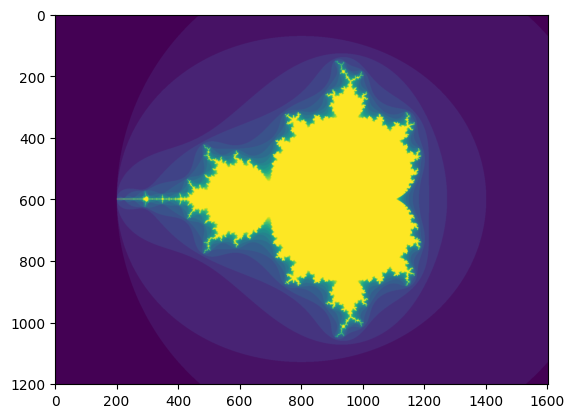

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4 * h + 1)
    y = np.linspace(-1.5, 1.5, 3 * w + 1)
    A, B = np.meshgrid(x, y)
    C = A + B * 1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r  # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i  # note when
        z[diverge] = r  # avoid diverging too much
    return divtime


plt.clf()
plt.imshow(mandelbrot(400, 400))
plt.show()

**Boolean arrays become very powerful when we use them for assignment**. Let's look at an example:


In [57]:
a2 = np.array([1, 2, 3, 4, 5])
a2[a2 > 2] = 99

print(a2)

[ 1  2 99 99 99]


The boolean array controls the values that the assignment applies to, and the other values remain unchanged.


Next, we'll look at an example of assignment using a boolean array with two dimensions:


In [60]:
b = np.linspace(1, 9, num=9, dtype=np.int32)
b = np.reshape(b, (3, 3))
c = b.copy()
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [61]:
b[b > 4] = 99

In [62]:
b

array([[ 1,  2,  3],
       [ 4, 99, 99],
       [99, 99, 99]], dtype=int32)

## Shape manipulation

- [Shape Manipulation](https://numpy.org/doc/stable/user/quickstart.html#shape-manipulation)
- [How to convert a 1D array into a 2D array (how to add a new axis to an array)](https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-convert-a-1d-array-into-a-2d-array-how-to-add-a-new-axis-to-an-array)



**1-DIMENSIONAL NUMPY ARRAYS ONLY HAVE ONE AXIS**


The important thing to know is that 1-dimensional NumPy arrays only have one axis.

If 1-d arrays only have one axis, can you guess the name of that axis?

Remember, axes are numbered like Python indexes. They start at 0.

So, in a 1-d NumPy array, the first and only axis is axis 0.


The fact that 1-d arrays have only one axis can cause some results that confuse NumPy beginners.


**2-DIMENSIONAL NUMPY ARRAYS**


Just like coordinate systems, NumPy arrays also have axes.


The best way to think about NumPy arrays is that they consist of two parts, a **data buffer** which is just a block of raw elements, and a **view** which describes how to interpret the data buffer.


The data buffer is typically what people think of as arrays in C or Fortran, a contiguous (and fixed) block of memory containing fixed sized data items. NumPy also contains a significant set of data that describes how to interpret the data in the data buffer.


For example, if we create an array of 12 integers:


In [88]:
a = np.arange(12)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


Then a consists of a data buffer, arranged something like this:


<pre class="lang-py s-code-block"><code class="hljs language-python">┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│  <span class="hljs-number">0</span> │  <span class="hljs-number">1</span> │  <span class="hljs-number">2</span> │  <span class="hljs-number">3</span> │  <span class="hljs-number">4</span> │  <span class="hljs-number">5</span> │  <span class="hljs-number">6</span> │  <span class="hljs-number">7</span> │  <span class="hljs-number">8</span> │  <span class="hljs-number">9</span> │ <span class="hljs-number">10</span> │ <span class="hljs-number">11</span> │
└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘
</code></pre>


In [89]:
a.shape

(12,)

In [90]:
# data location in memory
a.__array_interface__["data"]

(2445998541456, False)

Here the shape (12,) means the array is indexed by a single index which runs from 0 to 11. Conceptually, if we label this single index i, the array a looks like this:


<pre class="lang-py s-code-block"><code class="hljs language-python">i= <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">3</span>    <span class="hljs-number">4</span>    <span class="hljs-number">5</span>    <span class="hljs-number">6</span>    <span class="hljs-number">7</span>    <span class="hljs-number">8</span>    <span class="hljs-number">9</span>   <span class="hljs-number">10</span>   <span class="hljs-number">11</span>
┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│  <span class="hljs-number">0</span> │  <span class="hljs-number">1</span> │  <span class="hljs-number">2</span> │  <span class="hljs-number">3</span> │  <span class="hljs-number">4</span> │  <span class="hljs-number">5</span> │  <span class="hljs-number">6</span> │  <span class="hljs-number">7</span> │  <span class="hljs-number">8</span> │  <span class="hljs-number">9</span> │ <span class="hljs-number">10</span> │ <span class="hljs-number">11</span> │
└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘
</code></pre>


In [91]:
a[2]

np.int64(2)

If we reshape an array, this doesn't change the data buffer. Instead, it creates a new view that describes a different way to interpret the data. So after:


In [92]:
b = a.reshape((3, 4))
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [93]:
b.shape

(3, 4)

In [94]:
b.__array_interface__["data"]

(2445998541456, False)

The array b has the same data buffer as a, but now it is indexed by two indices which run from 0 to 2 and 0 to 3 respectively. If we label the two indices i and j, the array b looks like this:


<pre class="lang-py s-code-block"><code class="hljs language-python">i= <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">1</span>    <span class="hljs-number">1</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">2</span>    <span class="hljs-number">2</span>    <span class="hljs-number">2</span>
j= <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">3</span>    <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">3</span>    <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">3</span>
┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│  <span class="hljs-number">0</span> │  <span class="hljs-number">1</span> │  <span class="hljs-number">2</span> │  <span class="hljs-number">3</span> │  <span class="hljs-number">4</span> │  <span class="hljs-number">5</span> │  <span class="hljs-number">6</span> │  <span class="hljs-number">7</span> │  <span class="hljs-number">8</span> │  <span class="hljs-number">9</span> │ <span class="hljs-number">10</span> │ <span class="hljs-number">11</span> │
└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘
</code></pre>


In [95]:
b[0, 2]

np.int64(2)

You can see that the second index changes quickly and the first index changes slowly. If you prefer this to be the other way round, you can specify the order parameter:


In [96]:
c = a.reshape((3, 4), order="F")

In [97]:
print(c)

[[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]


In [98]:
c.shape

(3, 4)

In [99]:
c.__array_interface__["data"]

(2445998541456, False)

In Fortran the first index is the most rapidly varying index when moving through the elements of a two dimensional array as it is stored in memory. If you adopt the matrix convention for indexing, then this means the matrix is stored one column at a time (since the first index moves to the next row as it changes). Thus Fortran is considered a Column-major language. C has just the opposite convention. In C, the last index changes most rapidly as one moves through the array as stored in memory. Thus C is a Row-major language. The matrix is stored by rows. Note that in both cases it presumes that the matrix convention for indexing is being used, i.e., for both Fortran and C, the first index is the row. Note this convention implies that the indexing convention is invariant and that the data order changes to keep that so.


Which results in an array indexed like this:


<pre class="lang-py s-code-block"><code class="hljs language-python">i= <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>
j= <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">1</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">2</span>    <span class="hljs-number">2</span>    <span class="hljs-number">3</span>    <span class="hljs-number">3</span>    <span class="hljs-number">3</span>
┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│  <span class="hljs-number">0</span> │  <span class="hljs-number">1</span> │  <span class="hljs-number">2</span> │  <span class="hljs-number">3</span> │  <span class="hljs-number">4</span> │  <span class="hljs-number">5</span> │  <span class="hljs-number">6</span> │  <span class="hljs-number">7</span> │  <span class="hljs-number">8</span> │  <span class="hljs-number">9</span> │ <span class="hljs-number">10</span> │ <span class="hljs-number">11</span> │
└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘
</code></pre>


In [100]:
c[2, 1]

np.int64(5)

It should now be clear what it means for an array to have a shape with one or more dimensions of size 1. After:


In [105]:
d = a.reshape((12, 1))

In [106]:
print(d)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [107]:
d.shape

(12, 1)

In [108]:
d.__array_interface__["data"]

(2445998541456, False)

The array d is indexed by two indices, the first of which runs from 0 to 11, and the second index is always 0:


<pre class="lang-py s-code-block"><code class="hljs language-python">i= <span class="hljs-number">0</span>    <span class="hljs-number">1</span>    <span class="hljs-number">2</span>    <span class="hljs-number">3</span>    <span class="hljs-number">4</span>    <span class="hljs-number">5</span>    <span class="hljs-number">6</span>    <span class="hljs-number">7</span>    <span class="hljs-number">8</span>    <span class="hljs-number">9</span>   <span class="hljs-number">10</span>   <span class="hljs-number">11</span>
j= <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>    <span class="hljs-number">0</span>
┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│  <span class="hljs-number">0</span> │  <span class="hljs-number">1</span> │  <span class="hljs-number">2</span> │  <span class="hljs-number">3</span> │  <span class="hljs-number">4</span> │  <span class="hljs-number">5</span> │  <span class="hljs-number">6</span> │  <span class="hljs-number">7</span> │  <span class="hljs-number">8</span> │  <span class="hljs-number">9</span> │ <span class="hljs-number">10</span> │ <span class="hljs-number">11</span> │
└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘
</code></pre>


and so:


In [109]:
d[10]

array([10])

In [110]:
d[10, 0]

np.int64(10)

In [111]:
e = a.reshape((12))

In [112]:
print(e)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [113]:
e.shape

(12,)

In [114]:
e.__array_interface__["data"]

(2445998541456, False)

This arrangement allow for very flexible use of arrays. One thing that it allows is simple changes of the metadata to change the interpretation of the array buffer. Changing the byteorder of the array is a simple change involving no rearrangement of the data. The shape of the array can be changed very easily without changing anything in the data buffer or any data copying at all.


Other operations, such as transpose, don’t move data elements around in the array, but rather change the information about the shape and strides so that the indexing of the array changes, but the data in the doesn’t move.


**Matrix notation uses the first index to indicate which row is being selected and the second index to indicate which column is selected.** This is opposite the geometrically oriented-convention for images where people generally think the first index represents x position (i.e., column) and the second represents y position (i.e., row). This alone is the source of much confusion; matrix-oriented users and image-oriented users expect two different things with regard to indexing.


**Adding Rows and Columns to ndarrays**


To start, let's learn how to add rows and columns to an ndarray. The technique we're going to use involves the `numpy.concatenate()` function. This function accepts:

- A list of ndarrays as the first, unnamed parameter.
- An integer for the axis parameter, where 0 will add rows and 1 will add columns.

The numpy.concatenate() function requires that each array have the same shape, excepting the dimension corresponding to axis. Let's look at an example to understand more precisely how that works. We have two arrays, ones and zeros:


In [61]:
ones = np.ones(3)
print(ones)
print(ones.shape)

[1. 1. 1.]
(3,)


In [62]:
ones = np.ones(shape=(3, 1))
print(ones)
print("----------")
print(ones[0])
print("----------")
print(ones[0, 0])
print(ones.shape)

[[1.]
 [1.]
 [1.]]
----------
[1.]
----------
1.0
(3, 1)


In [63]:
ones = np.ones(shape=(1, 3))
print(ones)
print("----------")
print(ones[0])
print("----------")
print(ones[0, 0])
print(ones.shape)

[[1. 1. 1.]]
----------
[1. 1. 1.]
----------
1.0
(1, 3)


In [64]:
ones = np.ones(shape=(2, 3, 2))
print(ones)
print("----------")
print(ones[0])
print("----------")
print(ones[0, 0])
print(ones.shape)

[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]
----------
[[1. 1.]
 [1. 1.]
 [1. 1.]]
----------
[1. 1.]
(2, 3, 2)


In [65]:
ones = np.ones((2, 3))
print(ones)

[[1. 1. 1.]
 [1. 1. 1.]]


In [66]:
zeros = np.zeros(3)
print(zeros)

[0. 0. 0.]


Let's try and use numpy.concatenate() to add zeros as a row. Because we are wanting to add a row, we use axis=0


In [67]:
combined = np.concatenate([ones, zeros], axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

We've got an error because our dimensions don't match - let's look at the shape of each array to see if we can understand why:


In [68]:
print(ones.shape)

(2, 3)


In [69]:
print(zeros.shape)

(3,)


Because we're using axis=0, our shapes have to match across all dimensions except the first. If we look at these two array's we can see that the second dimension of ones is 3, but zeros doesn't have a second dimension, because it's only a 1D array. This is the source of our error. The table below shows the shapes we need to be able to combine these arrays.

<table>
<thead>
<tr>
<th>Object</th>
<th>Current shape</th>
<th>Desired Shape</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>ones</code></td>
<td><code>(2, 3)</code></td>
<td><code>(2, 3)</code></td>
</tr>
<tr>
<td><code>zeros</code></td>
<td><code>(3,)</code></td>
<td><code>(1, 3)</code></td>
</tr>
</tbody>
</table>


In order to adjust the shape of zeros, we can use the numpy.expand_dims() function. We'll start by passing axis=0 because we want to convert our 1D array into a 2D array representing a row:


In [70]:
zeros

array([0., 0., 0.])

In [71]:
np.expand_dims(zeros, axis=0)

array([[0., 0., 0.]])

In [72]:
np.expand_dims(zeros, axis=1)

array([[0.],
       [0.],
       [0.]])

In [73]:
zeros_2d = np.expand_dims(zeros, axis=0)

In [74]:
print(zeros_2d)

[[0. 0. 0.]]


In [75]:
print(zeros_2d.shape)

(1, 3)


Finally, we can use numpy.concatenate() to combine the two arrays:


In [76]:
combined = np.concatenate([ones, zeros_2d], axis=0)

In [77]:
print(combined)

[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]


Adding a column is done the same way, except substituting axis=1 for axis=0 in both functions.


**Changing the shape of an array**

An array has a shape given by the number of elements along each axis:

In [4]:
rg = np.random.default_rng(1)
a = np.floor(10 * rg.random((3, 4)))
a

array([[5., 9., 1., 9.],
       [3., 4., 8., 4.],
       [5., 0., 7., 5.]])

In [5]:
a.shape

(3, 4)

The shape of an array can be changed with various commands. Note that the following three commands **all return a modified array, but do not change the original array**:

In [6]:
a.ravel()  # returns the array, flattened

array([5., 9., 1., 9., 3., 4., 8., 4., 5., 0., 7., 5.])

In [7]:
a.reshape(6, 2)  # returns the array with a modified shape

array([[5., 9.],
       [1., 9.],
       [3., 4.],
       [8., 4.],
       [5., 0.],
       [7., 5.]])

In [8]:
a.T  # returns the array, transposed

array([[5., 3., 5.],
       [9., 4., 0.],
       [1., 8., 7.],
       [9., 4., 5.]])

The `reshape` function returns its argument with a modified shape, whereas the ndarray.resize **method modifies the array itself**:


In [9]:
a

array([[5., 9., 1., 9.],
       [3., 4., 8., 4.],
       [5., 0., 7., 5.]])

In [10]:
a.resize((2, 6))

In [11]:
a

array([[5., 9., 1., 9., 3., 4.],
       [8., 4., 5., 0., 7., 5.]])

If a dimension is given as `-1` in a reshaping operation, the **other dimensions are automatically calculated**:

In [12]:
a.reshape(3, -1)

array([[5., 9., 1., 9.],
       [3., 4., 8., 4.],
       [5., 0., 7., 5.]])

**Stacking together different arrays**

Several arrays can be stacked together along different axes:

In [13]:
a = np.floor(10 * rg.random((2, 2)))
a

array([[3., 7.],
       [3., 4.]])

In [14]:
b = np.floor(10 * rg.random((2, 2)))
b

array([[1., 4.],
       [2., 2.]])

In [16]:
np.vstack((a, b))

array([[3., 7.],
       [3., 4.],
       [1., 4.],
       [2., 2.]])

In [17]:
np.hstack((a, b))

array([[3., 7., 1., 4.],
       [3., 4., 2., 2.]])

The function `column_stack` stacks 1D arrays as columns into a 2D array. It is equivalent to `hstack` only for 2D arrays:

In [18]:
np.column_stack((a, b))

array([[3., 7., 1., 4.],
       [3., 4., 2., 2.]])

In [19]:
a = np.array([4.0, 2.0])
b = np.array([3.0, 8.0])

np.column_stack((a, b))  # returns a 2D array

array([[4., 3.],
       [2., 8.]])

In [22]:
np.hstack((a, b))  # the result is different

array([4., 2., 3., 8.])

In general, for arrays with more than two dimensions, hstack stacks along their second axes, vstack stacks along their first axes.

**Splitting one array into several smaller ones**

Using `hsplit`, you can split an array along its horizontal axis, either by specifying the number of equally shaped arrays to return, or by specifying the columns after which the division should occur:

In [25]:
a = np.floor(10 * rg.random((2, 12)))
a

array([[8., 5., 5., 7., 1., 8., 6., 7., 1., 8., 1., 0.],
       [8., 8., 8., 4., 2., 0., 6., 7., 8., 2., 2., 6.]])

In [26]:
np.hsplit(a, 3)

[array([[8., 5., 5., 7.],
        [8., 8., 8., 4.]]),
 array([[1., 8., 6., 7.],
        [2., 0., 6., 7.]]),
 array([[1., 8., 1., 0.],
        [8., 2., 2., 6.]])]

In [27]:
# Split `a` after the third and the fourth column
np.hsplit(a, (3, 4))

[array([[8., 5., 5.],
        [8., 8., 8.]]),
 array([[7.],
        [4.]]),
 array([[1., 8., 6., 7., 1., 8., 1., 0.],
        [2., 0., 6., 7., 8., 2., 2., 6.]])]

`vsplit` splits along the vertical axis

In [37]:
a = np.floor(10 * rg.random((4, 12)))
print(a)
np.vsplit(a, 2)

[[8. 0. 3. 5. 6. 2. 3. 9. 6. 5. 0. 0.]
 [2. 1. 9. 0. 3. 0. 6. 0. 0. 0. 2. 5.]
 [8. 2. 2. 8. 7. 1. 8. 8. 1. 6. 1. 2.]
 [4. 5. 4. 5. 2. 7. 2. 9. 5. 3. 1. 4.]]


[array([[8., 0., 3., 5., 6., 2., 3., 9., 6., 5., 0., 0.],
        [2., 1., 9., 0., 3., 0., 6., 0., 0., 0., 2., 5.]]),
 array([[8., 2., 2., 8., 7., 1., 8., 8., 1., 6., 1., 2.],
        [4., 5., 4., 5., 2., 7., 2., 9., 5., 3., 1., 4.]])]

In [38]:
np.vsplit(a, (1, 3))

[array([[8., 0., 3., 5., 6., 2., 3., 9., 6., 5., 0., 0.]]),
 array([[2., 1., 9., 0., 3., 0., 6., 0., 0., 0., 2., 5.],
        [8., 2., 2., 8., 7., 1., 8., 8., 1., 6., 1., 2.]]),
 array([[4., 5., 4., 5., 2., 7., 2., 9., 5., 3., 1., 4.]])]

**How to convert a 1D array into a 2D array**

You can use `np.newaxis` and `np.expand_dims` to increase the dimensions of your existing array.

Using `np.newaxis` will increase the dimensions of your array by one dimension when used once. This means that a 1D array will become a 2D array, a 2D array will become a 3D array, and so on.

For example, if you start with this array:

In [43]:
a = np.array([1, 2, 3, 4, 5, 6])
a.shape

[1 2 3 4 5 6]


(6,)

In [45]:
a

array([1, 2, 3, 4, 5, 6])

You can use `np.newaxis` to add a new axis:

In [46]:
a2 = a[np.newaxis, :]
a2.shape

(1, 6)

In [47]:
a

array([1, 2, 3, 4, 5, 6])

You can explicitly convert a 1D array to either a row vector or a column vector using `np.newaxis`. For example, you can convert a 1D array to a row vector by inserting an axis along the first dimension:

In [48]:
row_vector = a[np.newaxis, :]
row_vector.shape

(1, 6)

Or, for a column vector, you can insert an axis along the second dimension:

In [49]:
col_vector = a[:, np.newaxis]
col_vector.shape

(6, 1)

In [50]:
col_vector

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

You can also expand an array by inserting a new axis at a specified position with `np.expand_dims`.

For example, if you start with this array:

In [52]:
a = np.array([1, 2, 3, 4, 5, 6])
a.shape

(6,)

You can use np.expand_dims to add an axis at index position 1 with:

In [53]:
b = np.expand_dims(a, axis=1)

In [54]:
b.shape

(6, 1)

You can add an axis at index position 0 with:

In [55]:
c = np.expand_dims(a, axis=0)
c.shape

(1, 6)

## Copies and views

- [Copies and views](https://numpy.org/doc/stable/user/quickstart.html#copies-and-views)
- [Copies and views](https://numpy.org/doc/stable/user/basics.copies.html#basics-copies-and-views)

When operating on NumPy arrays, it is possible to access the internal data buffer directly using a view without copying data around. This ensures good performance but can also cause unwanted problems if the user is not aware of how this works. Hence, it is important to know the difference between these two terms and to know which operations return copies and which return views.

The NumPy array is a data structure consisting of two parts: the contiguous data buffer with the actual data elements and the metadata that contains information about the data buffer. The metadata includes data type, strides, and other important information that helps manipulate the ndarray easily.

**View**: It is possible to access the array differently by just changing certain metadata like stride and dtype without changing the data buffer. This creates a new way of looking at the data and these new arrays are called views. The data buffer remains the same, so any changes made to a view reflects in the original copy. A view can be forced through the ndarray.view method.

**Copy**: When a new array is created by duplicating the data buffer as well as the metadata, it is called a copy. Changes made to the copy do not reflect on the original array. Making a copy is slower and memory-consuming but sometimes necessary. A copy can be forced by using ndarray.copy.

**No Copy at All**


When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners. There are three cases:


Simple assignments make no copy of objects or their data.


In [115]:
a = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
b = a  # no new object is created
b is a  # a and b are two names for the same ndarray object

True

Python passes mutable objects as references, so function calls make no copy.


In [116]:
def f(x):
    print(id(x))


print(id(a))  # id is a unique identifier of an object
f(a)

2446710153904
2446710153904


**View or Shallow Copy**


Different array objects can share the same data. The view method creates a new array object that looks at the same data.


In [117]:
c = a.view()

In [118]:
c is a

False

In [119]:
c.base is a  # c is a view of the data owned by a

True

In [120]:
print(a.shape)
c = c.reshape((2, 6))  # a's shape doesn't change

(3, 4)


In [121]:
a.shape

(3, 4)

In [122]:
print(a)
c[0, 4] = 1234  # a's data changes
print(a)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[   0    1    2    3]
 [1234    5    6    7]
 [   8    9   10   11]]


Slicing an array returns a view of it:


In [123]:
s = a[:, 1:3]
s[:] = 10
a


array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

**Deep Copy**


The copy method makes a complete copy of the array and its data.


In [124]:
d = a.copy()  # a new array object with new data is created
print(d is a)
print(d.base is a)  # d doesn't share anything with a


False
False


In [125]:
d[0, 0] = 9999
print(a)

[[   0   10   10    3]
 [1234   10   10    7]
 [   8   10   10   11]]


Sometimes copy should be called after slicing if the original array is not required anymore. For example, suppose a is a huge intermediate result and the final result b only contains a small fraction of a, a deep copy should be made when constructing b with slicing:


In [126]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a  # the memory of ``a`` can be released.

If `b = a[:100]` is used instead, a is referenced by b and will persist in memory even if del a is executed.


**Indexing operations**

Views are created when elements can be addressed with offsets and strides in the original array. Hence, basic indexing always creates views. For example:

In [136]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [137]:
y = x[1:3]  # creates a view
y

array([1, 2])

In [138]:
x[1:3] = [10, 11]
x

array([ 0, 10, 11,  3,  4,  5,  6,  7,  8,  9])

In [139]:
y

array([10, 11])

Here, y gets changed when x is changed because it is a view.

Advanced indexing, on the other hand, always creates copies. For example:

In [140]:
x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [141]:
y = x[[1, 2]]
y

array([[3, 4, 5],
       [6, 7, 8]])

In [142]:
y.base is None

# Here, ``y`` is a copy, as signified by the :attr:`base <.ndarray.base>`
# attribute. We can also confirm this by assigning new values to ``x[[1, 2]]``
# which in turn will not affect ``y`` at all::

True

In [143]:
x[[1, 2]] = [[10, 11, 12], [13, 14, 15]]
x

array([[ 0,  1,  2],
       [10, 11, 12],
       [13, 14, 15]])

In [144]:
y

array([[3, 4, 5],
       [6, 7, 8]])

It must be noted here that during the assignment of x[[1, 2]] no view or copy is created as the assignment happens in-place.

**How to tell if the array is a view or a copy**

The base attribute of the ndarray makes it easy to tell if an array is a view or a copy. The base attribute of a view returns the original array while it returns None for a copy.

In [127]:
x = np.arange(9)

In [128]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [129]:
y = x.reshape(3, 3)

In [130]:
y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [132]:
y.base  # .reshape() creates a view

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [134]:
z = y[[2, 1]]
z

array([[6, 7, 8],
       [3, 4, 5]])

In [135]:
z.base is None  # advanced indexing creates a copy

True

Note that the base attribute should not be used to determine if an ndarray object is new; only if it is a view or a copy of another ndarray.

## Examples of real life usage

1. **Data Analysis**: NumPy is widely used in data analysis applications, where it provides powerful tools for processing and manipulating large datasets. For example, NumPy can be used to calculate statistical measures such as mean, median, and standard deviation.
2. **Finance**: NumPy is commonly used in finance applications, where it is used to calculate financial indicators such as interest rates, bond yields, and stock prices. For example, NumPy can be used to calculate the returns of a portfolio of stocks.
3. **Image Processing**: NumPy is widely used in image processing applications, where it provides tools for processing and manipulating images. For example, NumPy can be used to apply filters to images, such as blurring or sharpening.
4. **Machine Learning**: NumPy is widely used in machine learning applications, where it provides tools for working with arrays and matrices, which are commonly used to represent datasets. For example, NumPy can be used to perform matrix operations in machine learning algorithms.
5. **Natural Language Processing (NLP)**: NumPy is commonly used in NLP applications, where it is used to represent text data as arrays or matrices. For example, NumPy can be used to represent the frequency of words in a corpus of text.
6. **Signal Processing**: NumPy is widely used in signal processing applications, where it provides tools for processing and manipulating signals, such as audio signals or sensor data. For example, NumPy can be used to perform Fourier transforms on signals.
7. **Astronomy**: NumPy is commonly used in astronomy applications, where it is used to process and manipulate astronomical data, such as telescope images or spectra. For example, NumPy can be used to process images from a telescope to remove noise and improve resolution.
8. **Physics**: NumPy is widely used in physics applications, where it is used to perform mathematical calculations and simulations. For example, NumPy can be used to simulate physical systems, such as the behavior of a pendulum or the motion of a planet.
9. **Climate Science**: NumPy is commonly used in climate science applications, where it is used to process and manipulate climate data, such as temperature or rainfall data. For example, NumPy can be used to calculate the average temperature over a region or time period.
10. **Robotics**: NumPy is widely used in robotics applications, where it is used to perform mathematical calculations and simulations. For example, NumPy can be used to simulate the behavior of a robotic arm or the motion of a robot in a 3D environment.
11. **Chemistry**: NumPy is commonly used in chemistry applications, where it is used to perform mathematical calculations and simulations. For example, NumPy can be used to simulate the behavior of molecules or to calculate the energy of a chemical reaction.
12. **Biology**: NumPy is widely used in biology applications, where it is used to process and analyze biological data, such as DNA sequences or protein structures. For example, NumPy can be used to compare DNA sequences to identify mutations or to analyze the structure of proteins.
13. **Engineering**: NumPy is commonly used in engineering applications, where it is used to perform mathematical calculations and simulations. For example, NumPy can be used to simulate the behavior of a mechanical system or to analyze the stresses in a structure.
14. **Neuroscience:** NumPy is widely used in neuroscience applications, where it is used to process and analyze brain data, such as EEG signals or MRI.


### Sky Simulations with NumPy

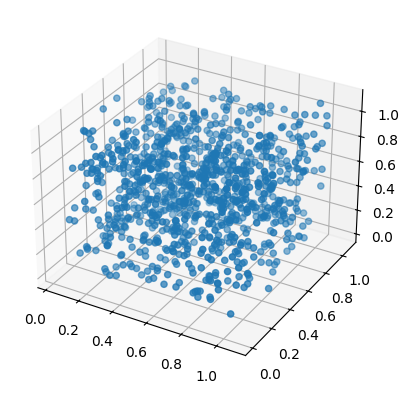

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Creating Star Clusters:
num_stars = 1000
dimensions = 3  # We live in a 3D universe.

# Create an array to hold the position vectors of all the stars.
rng = np.random.default_rng(1337)
positions = rng.random((num_stars, dimensions))

# Create an array to hold the velocity vectors of all the stars.
velocities = rng.random((num_stars, dimensions))

# Calculating Distances:
distances = np.sqrt(np.sum((positions[:, np.newaxis, :] - positions[np.newaxis, :, :]) ** 2, axis=-1))

# Simulating Time Evolution:
time_step = 0.1  # Arbitrary time step
positions += velocities * time_step

# Visualizing the Cluster:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])
plt.show()

### Image Processing

In [164]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image using PIL (Python Imaging Library)
img = Image.open(Path.cwd().parent / "data" / "cat.jpg")

# Convert the image to a NumPy array
img_array = np.array(img)
print(f"Image shape: {img_array.shape}")

Image shape: (3999, 3000, 3)


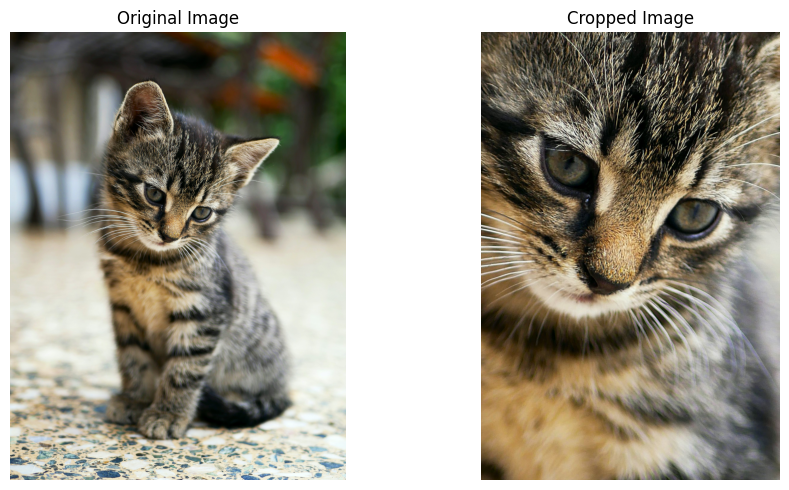

In [165]:
# Crop Image
# Define the cropping coordinates
y1, x1 = 1000, 1000  # Top-left corner of ROI
y2, x2 = 2500, 2000  # Bottom-right corner of ROI
cropped_img = img_array[y1:y2, x1:x2]

# Display the original image and the cropped image
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis("off")

# Display the cropped image
plt.subplot(1, 2, 2)
plt.imshow(cropped_img)
plt.title("Cropped Image")
plt.axis("off")

plt.tight_layout()
plt.show()

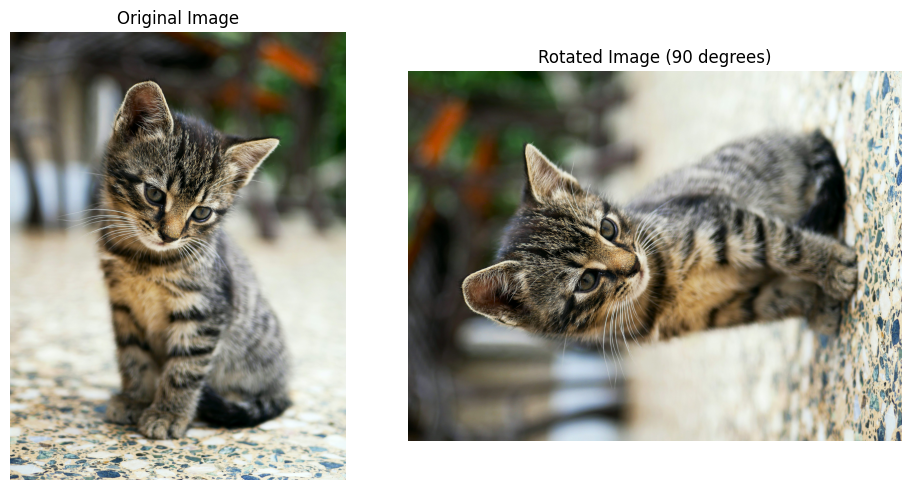

In [166]:
# Rotate Image
# Rotate the image by 90 degrees counterclockwise
rotated_img = np.rot90(img_array)

# Display the original image and the rotated image
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis("off")

# Display the rotated image
plt.subplot(1, 2, 2)
plt.imshow(rotated_img)
plt.title("Rotated Image (90 degrees)")
plt.axis("off")

plt.tight_layout()
plt.show()

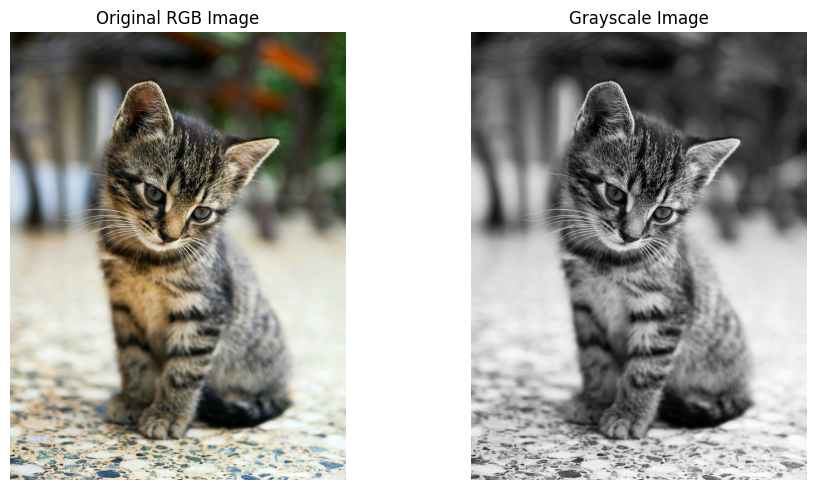

In [167]:
# Color Space Conversion
# Grayscale conversion formula: Y = 0.299*R + 0.587*G + 0.114*B
gray_img = np.dot(img_array[..., :3], [0.299, 0.587, 0.114])

# Display the original RGB image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original RGB Image")
plt.axis("off")

# Display the converted grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.tight_layout()
plt.show()

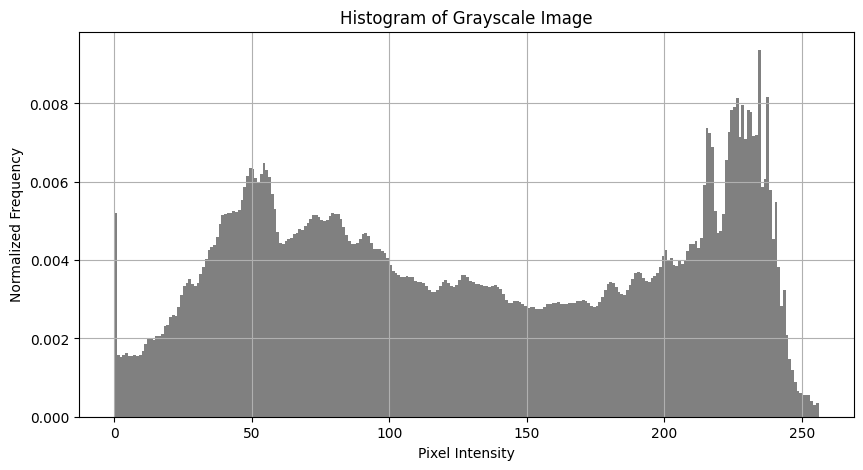

In [168]:
# Pixel Intensity Histogram
# Compute the histogram of the image
hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0, 256))

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(img_array.flatten(), bins=256, range=(0, 256), density=True, color="gray")
plt.xlabel("Pixel Intensity")
plt.ylabel("Normalized Frequency")
plt.title("Histogram of Grayscale Image")
plt.grid(visible=True)
plt.show()

### Analyzing the impact of the lockdown on air quality in Delhi, India

The pandas library is preferable to use for time-series data analysis.

https://numpy.org/numpy-tutorials/content/tutorial-air-quality-analysis.html


### X-ray image processing

This tutorial demonstrates how to read and process X-ray images with NumPy, imageio, Matplotlib and SciPy: https://numpy.org/numpy-tutorials/content/tutorial-x-ray-image-processing.htmlm

## NumPy Exercises

Source: [101 NumPy Exercises for Data Analysis (Python)](https://www.machinelearningplus.com/python/101-numpy-exercises-python/)

In [ ]:
import numpy as np

### 1.Create a null vector of size 10

Expected result: `[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]`

### 2.Create a null vector of size 10 but the fifth value which is 1

Expected result: `[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]`

### 3.Create a vector with values ranging from 10 to 49

Expected result: `[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]`

### 4.Reverse a vector (first element becomes last)

In [ ]:
Z = np.arange(50)

Expected result: `[49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2 1  0]`

### 5.Create a 3x3 matrix with values ranging from 0 to 8

**Help**: method .reshape() -> [Documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

Expected result: 

`[[0 1 2]
 [3 4 5]
 [6 7 8]]`

### 6.Find indices of non-zero elements from [1,2,0,0,4,0]

In [ ]:
a = [1, 2, 0, 0, 4, 0]

Expected result: `(array([0, 1, 4], dtype=int64),)`

### 7.Create a 3x3 identity matrix

Expected result: 

`[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]`

### 8.Create a 3x3x3 array with random values

Expected result: 
    
```
[[[0.61712056 0.38943629 0.16277319]
  [0.19481511 0.12725415 0.6717974 ]
  [0.15340477 0.78713636 0.52864134]]

 [[0.91153827 0.7756351  0.88600077]
  [0.03509814 0.79676837 0.39167056]
  [0.55410251 0.67583417 0.64169036]]

 [[0.46862042 0.05954143 0.42512482]
  [0.34746791 0.97653267 0.0024134 ]
  [0.53522577 0.37192358 0.29601563]]]```

### 9.Create a 10x10 array with random values and find the minimum and maximum values

Expected result: `Zmin= 0.004874889654358006 Zmax= 0.992254173881756`

### 10.Create a 2d array (10x10) with 1 on the border and 0 inside

Expected result: 
    
`[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]`

### 11.What is the result of the following expression?

In [ ]:
0 * np.nan

In [ ]:
np.nan == np.nan

In [ ]:
np.inf > np.nan

In [ ]:
np.nan - np.nan

In [ ]:
0.3 == 3 * 0.1

### 12.Create a 8x8 matrix and fill it with a checkerboard pattern

Expected result: 

`[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]`

### 13.Given a 1D array, negate all elements which are between 3 and 8, in place.

In [ ]:
Z = np.arange(11)

In [ ]:
Z

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Expected result: `[ 0  1  2  3 -4 -5 -6 -7 -8  9 10]`

### 14.Create a vector of size 10 with values ranging from 0 to 1, both excluded

Expected result: `[0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091]`

### 15.Create a random vector of size 10 and sort it

Expected result: `[0.08755811 0.17786018 0.45041482 0.48746541 0.68379823 0.70209576 0.77273884 0.86106446 0.93083351 0.98349603]`

### 16. Consider two random array A anb B, check if they are equal

In [8]:
rng = np.random.default_rng()
A = rng.integers(0, 2, 5)

In [9]:
B = rng.integers(0, 2, 5)

### 17.Make an array immutable (read-only)

In [ ]:
Z = np.zeros(10)

### 18.Create random vector of size 10 and replace the maximum value by 0

### 19.How to convert an integer (32 bits)  array into a float (32 bits) in place?

In [ ]:
Z = np.arange(10, dtype=np.int32)

In [ ]:
print(Z)

[0 1 2 3 4 5 6 7 8 9]


Expected result: `[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]`

### 20.How to find the most frequent value in an array?

**Help:** method .bincount() -> [Docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html?highlight=bincount#numpy.bincount)

In [5]:
rng = np.random.default_rng()
Z = rng.integers(0, 10, 50)
print(Z)

[2 4 3 7 1 7 5 5 6 1 9 7 9 6 6 5 6 9 0 2 4 8 8 7 8 8 5 5 4 6 5 3 2 0 3 0 3
 5 5 9 6 8 4 2 6 2 4 8 4 7]
